In [2]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [3]:
credit_df = pd.read_csv("german_credit.csv")

In [4]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [6]:
credit_df.head(2)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = credit_df.drop(labels='default', axis=1)

In [9]:
y = credit_df['default']

In [10]:
# Lets build a Ensemble model but need to modify the dataset first
x1, x2, y1, y2 = train_test_split(x, y, test_size=0.50, random_state=1)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [11]:
x1_dummy = pd.get_dummies(x1)

### Check for highly correlated variables but don't required any treatment for this use case

In [46]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                print(colname,"\n")

In [47]:
correlation(x1_dummy, 0.1)

credit_amount 

installment_as_income_perc 

age 

people_under_maintenance 

account_check_status_0 <= ... < 200 DM 

account_check_status_no checking account 

credit_history_all credits at this bank paid back duly 

credit_history_critical account/ other credits existing (not at this bank) 

credit_history_critical account/ other credits existing (not at this bank) 

credit_history_delay in paying off in the past 

credit_history_delay in paying off in the past 

credit_history_no credits taken/ all credits paid back duly 

purpose_business 

purpose_car (used) 

purpose_car (used) 

purpose_radio/television 

purpose_repairs 

purpose_repairs 

savings_... < 100 DM 

savings_... < 100 DM 

savings_unknown/ no savings account 

present_emp_since_.. >= 7 years 

present_emp_since_.. >= 7 years 

present_emp_since_... < 1 year  

present_emp_since_1 <= ... < 4 years 

present_emp_since_4 <= ... < 7 years 

present_emp_since_unemployed 

personal_status_sex_female : divorced/separated/

### Drop the original variables which are converted to dummy

In [12]:
# This action is not required as the get_dummies method has replaced the original categorical variable columns with the corresponding dummy columns.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x1_dummy, y1, test_size=0.30, random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [14]:
from sklearn.ensemble import RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
Rf_model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion='entropy',random_state=9999 )

In [16]:
Rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [17]:
y_predict_Rf=Rf_model.predict(x_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [18]:
from sklearn import metrics

In [19]:
Rf_acc=metrics.accuracy_score(y_test,y_predict_Rf)
print(Rf_acc)

0.7533333333333333


In [20]:
Rf_cm=metrics.confusion_matrix(y_test , y_predict_Rf)
print(Rf_cm)

[[96  8]
 [29 17]]


### Q6 Show the list of the features importance( 1 Marks)

In [21]:
print (pd.Series(Rf_model.feature_importances_,index = list(x1_dummy)).sort_values(ascending=False))

credit_amount                                                                 0.099335
age                                                                           0.087813
duration_in_month                                                             0.061128
account_check_status_no checking account                                      0.045243
installment_as_income_perc                                                    0.042206
present_res_since                                                             0.032136
account_check_status_< 0 DM                                                   0.027337
purpose_car (new)                                                             0.024779
credit_history_critical account/ other credits existing (not at this bank)    0.022426
credits_this_bank                                                             0.019030
present_emp_since_... < 1 year                                                0.018725
property_real estate                       

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [23]:
# Use below values
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)

In [24]:
#Validate the Random Forest model build above using k fold

In [25]:
model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion='entropy',random_state=9999 )

In [26]:
#Calculate Mean score

In [27]:
results = cross_val_score(model, x1_dummy, y1, scoring='neg_mean_squared_error', cv=kfold)

In [28]:
# Calculate score standard deviation using std()

In [29]:
print("Mean Square Error: %.3f (%.3f)" % (-results.mean(), results.std()))

Mean Square Error: 0.242 (0.075)


# Q8 Print the confusion matrix( 1 Marks)

In [30]:
model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion='entropy',random_state=9999 )

In [31]:
scores = []
precisions = []
recalls = []
confusion = []

In [32]:
i = 1
for train_idx, test_idx in kfold.split(x1_dummy, y1):
    model.fit(x1_dummy.iloc[train_idx], y1.iloc[train_idx])
    predictions = model.predict(x1_dummy.iloc[test_idx])
    print("Confusion Matrix for iteration:", i, "\n")
    print(metrics.confusion_matrix(y1.iloc[test_idx], predictions))
    print("\n")
    scores.append(metrics.accuracy_score(y1.iloc[test_idx], predictions))
    recalls.append(metrics.recall_score(y1.iloc[test_idx], predictions))
    precisions.append(metrics.precision_score(y1.iloc[test_idx], predictions))
    i += 1

Confusion Matrix for iteration: 1 

[[33  1]
 [ 8  8]]


Confusion Matrix for iteration: 2 

[[34  2]
 [ 6  8]]


Confusion Matrix for iteration: 3 

[[25  3]
 [16  6]]


Confusion Matrix for iteration: 4 

[[29  3]
 [11  7]]


Confusion Matrix for iteration: 5 

[[32  7]
 [ 7  4]]


Confusion Matrix for iteration: 6 

[[38  0]
 [ 7  5]]


Confusion Matrix for iteration: 7 

[[36  2]
 [10  2]]


Confusion Matrix for iteration: 8 

[[32  3]
 [ 5 10]]


Confusion Matrix for iteration: 9 

[[29  1]
 [14  6]]


Confusion Matrix for iteration: 10 

[[32  2]
 [13  3]]




# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [33]:
#Printing the mean of accuracy score, precision and recall

In [34]:
sum(scores) / len(scores)

0.758

In [35]:
sum(precisions) / len(precisions)

0.7145565545565544

In [36]:
sum(recalls) / len(recalls)

0.38341810966810963

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [37]:
#Hint: Use roc_curve

In [38]:
model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion='entropy',random_state=9999 )

In [39]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

In [40]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

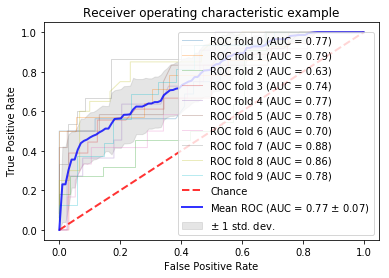

In [41]:
i = 0
for train_idx, test_idx in kfold.split(x1_dummy, y1):
    probas_ = model.fit(x1_dummy.iloc[train_idx], y1.iloc[train_idx]).predict_proba(x1_dummy.iloc[test_idx])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1.iloc[test_idx], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [48]:
# Done as part of the previous plot(Values mentioned in the label)

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [ ]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []